# __Motion Summary for fetal resting state data:__

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import nilearn
from nilearn import plotting
from nilearn import datasets
import nibabel as nib
import sklearn
from scipy.stats import norm
from scipy.stats.stats import pearsonr
import seaborn as sns

In [5]:
import warnings
warnings.simplefilter("ignore")

In [6]:
motionFD1 = pd.read_csv('../../../Desktop/Work/fetal_data/fetal_motion/merged1.csv')
motionFD09 = pd.read_csv('../../../Desktop/Work/fetal_data/fetal_motion/merged09.csv')
motionFD08 = pd.read_csv('../../../Desktop/Work/fetal_data/fetal_motion/merged08.csv')
motionFD07 = pd.read_csv('../../../Desktop/Work/fetal_data/fetal_motion/merged07.csv')
motionFD06 = pd.read_csv('../../../Desktop/Work/fetal_data/fetal_motion/merged06.csv')
motionFD05 = pd.read_csv('../../../Desktop/Work/fetal_data/fetal_motion/merged05.csv')

In [7]:
motionFD1['VolumesPostCensor'].mean()

59.53719008264463

In [8]:
motionFD09['VolumesPostCensor'].mean()

49.96143250688705

In [9]:
motionFD08['VolumesPostCensor'].mean()

40.672176308539946

In [10]:
motionFD07['VolumesPostCensor'].mean()

31.47382920110193

In [11]:
motionFD06['VolumesPostCensor'].mean()

23.12121212121212

In [12]:
motionFD05['VolumesPostCensor'].mean()

15.950413223140496

In [13]:
motionFD1['Frame Count'].iloc[0:192].mean()
#motionFD1[['Frame Count'].iloc[[0:]].mean()

160.359375

In [14]:
motionFD1['Old-New'] = motionFD1['Frame Count'] - motionFD1['VolumesPostCensor']
motionFD09['Old-New'] = motionFD09['Frame Count'] - motionFD09['VolumesPostCensor']
motionFD08['Old-New'] = motionFD08['Frame Count'] - motionFD08['VolumesPostCensor']
motionFD07['Old-New'] = motionFD07['Frame Count'] - motionFD07['VolumesPostCensor']
motionFD06['Old-New'] = motionFD06['Frame Count'] - motionFD06['VolumesPostCensor']
motionFD05['Old-New'] = motionFD05['Frame Count'] - motionFD05['VolumesPostCensor']

In [15]:
len(motionFD1)

363

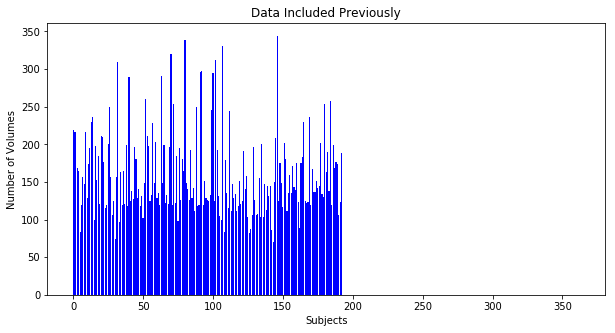

In [16]:
plt.figure(figsize=(10,5))
A = motionFD1['Frame Count']
B = motionFD1['VolumesPostCensor']
X = range(363)

plt.bar(X, A, color = 'b')
#plt.bar(X, B, color = 'r')
plt.xlabel('Subjects')
plt.ylabel('Number of Volumes')
plt.title('Data Included Previously')
plt.show()

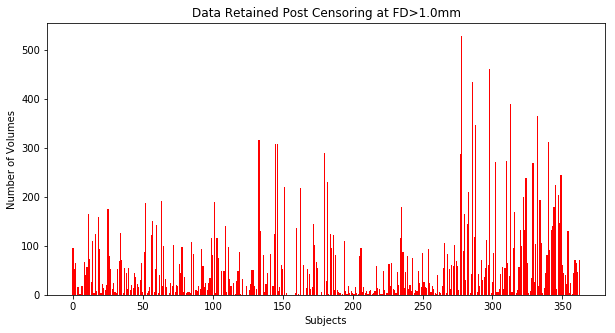

In [17]:
plt.figure(figsize=(10,5))
A = motionFD1['Frame Count']
B = motionFD1['VolumesPostCensor']
X = range(363)

#plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r')
plt.xlabel('Subjects')
plt.ylabel('Number of Volumes')
plt.title('Data Retained Post Censoring at FD>1.0mm')
plt.show()

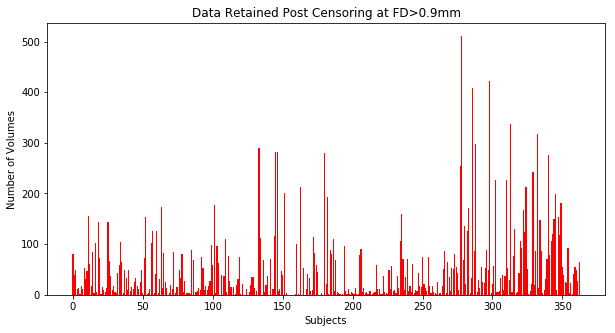

In [18]:
plt.figure(figsize=(10,5))
A = motionFD09['Frame Count']
B = motionFD09['VolumesPostCensor']
X = range(363)

#plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r')
plt.xlabel('Subjects')
plt.ylabel('Number of Volumes')
plt.title('Data Retained Post Censoring at FD>0.9mm')
plt.show()

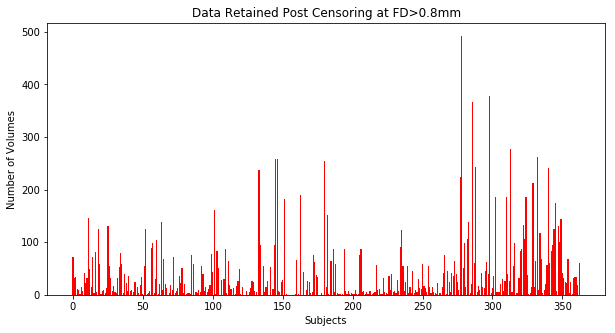

In [19]:
plt.figure(figsize=(10,5))
A = motionFD08['Frame Count']
B = motionFD08['VolumesPostCensor']
X = range(363)

#plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r')
plt.xlabel('Subjects')
plt.ylabel('Number of Volumes')
plt.title('Data Retained Post Censoring at FD>0.8mm')
plt.show()

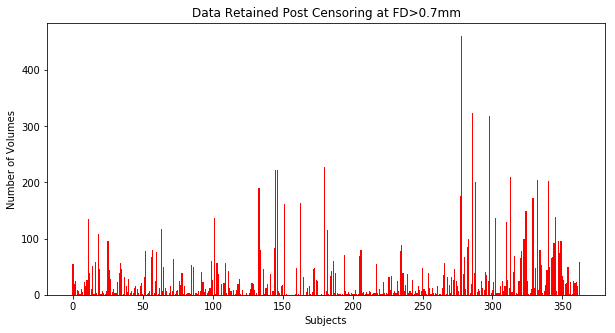

In [20]:
plt.figure(figsize=(10,5))
A = motionFD07['Frame Count']
B = motionFD07['VolumesPostCensor']
X = range(363)

#plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r')
plt.xlabel('Subjects')
plt.ylabel('Number of Volumes')
plt.title('Data Retained Post Censoring at FD>0.7mm')
plt.show()

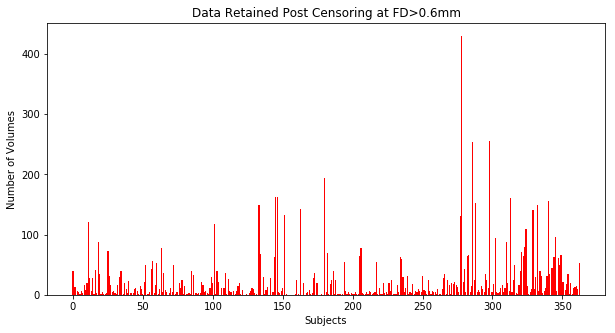

In [21]:
plt.figure(figsize=(10,5))
A = motionFD06['Frame Count']
B = motionFD06['VolumesPostCensor']
X = range(363)

#plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r')
plt.xlabel('Subjects')
plt.ylabel('Number of Volumes')
plt.title('Data Retained Post Censoring at FD>0.6mm')
plt.show()

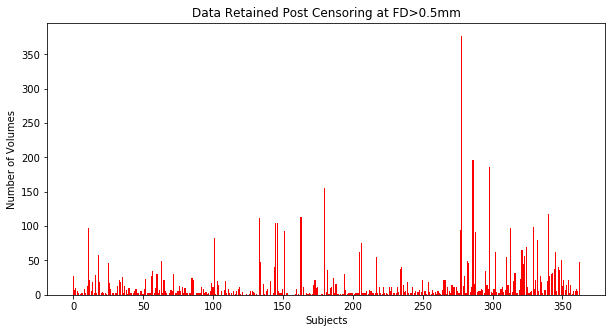

In [22]:
plt.figure(figsize=(10,5))
A = motionFD05['Frame Count']
B = motionFD05['VolumesPostCensor']
X = range(363)

#plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r')
plt.xlabel('Subjects')
plt.ylabel('Number of Volumes')
plt.title('Data Retained Post Censoring at FD>0.5mm')
plt.show()

In [23]:
all_motion = pd.read_csv('../../../Desktop/Work/fetal_data/fetal_motion/fetal_motion_summary_allthresholds.csv')

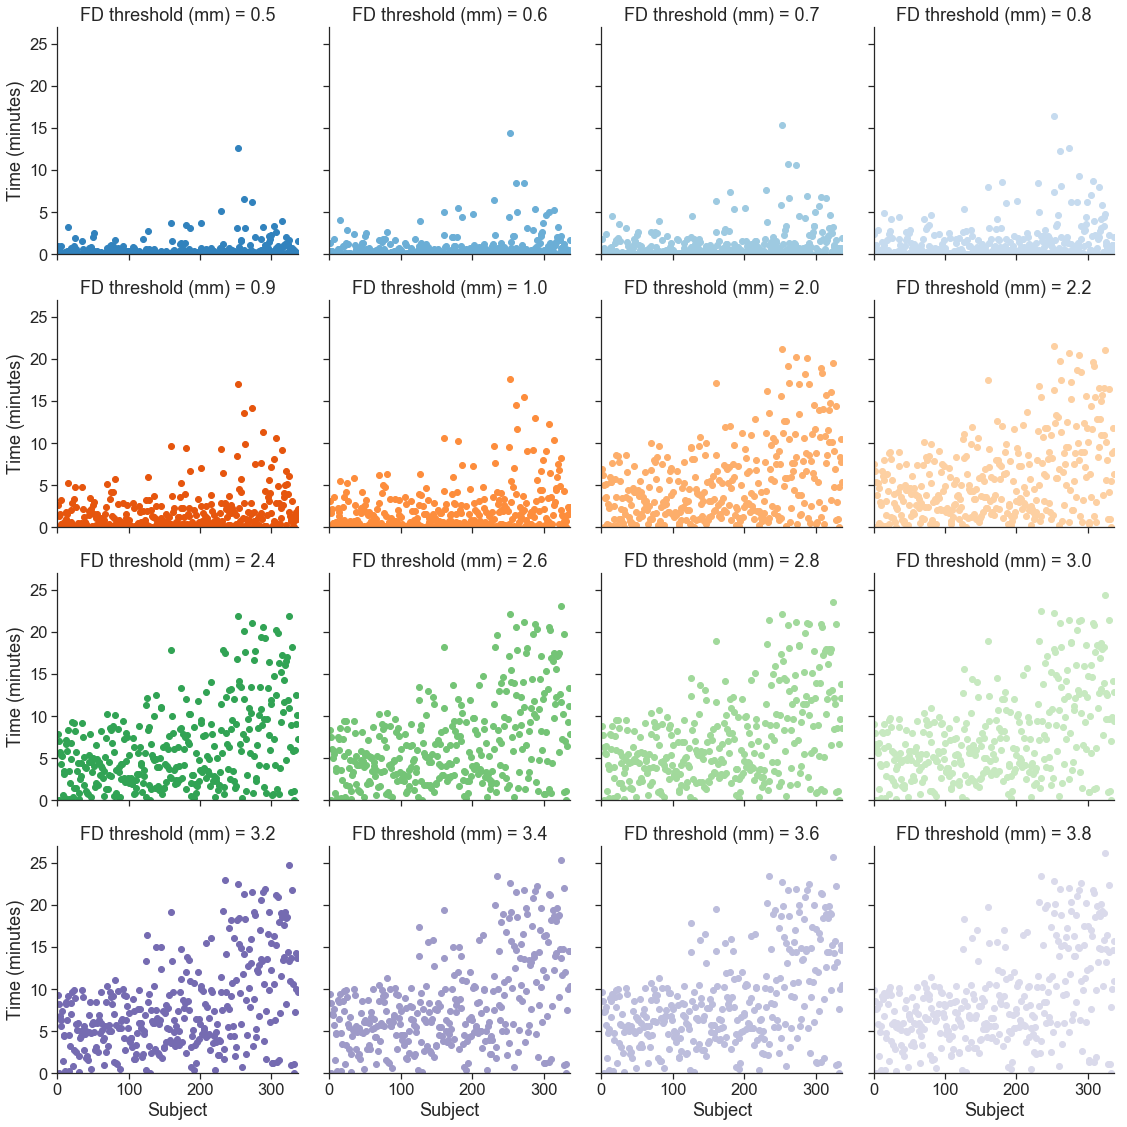

In [24]:
sns.set(style="ticks", font_scale=1.5)
#sns.set_context(font_scale=1.5)
grid = sns.FacetGrid(all_motion, col="FD threshold (mm)", hue="FD threshold (mm)", palette="tab20c", col_wrap=4, height=4)
grid.map(plt.scatter, "Subject", "Time (minutes)", marker="o")
grid.set(xlim=(0, 337), ylim=(0, 27),)

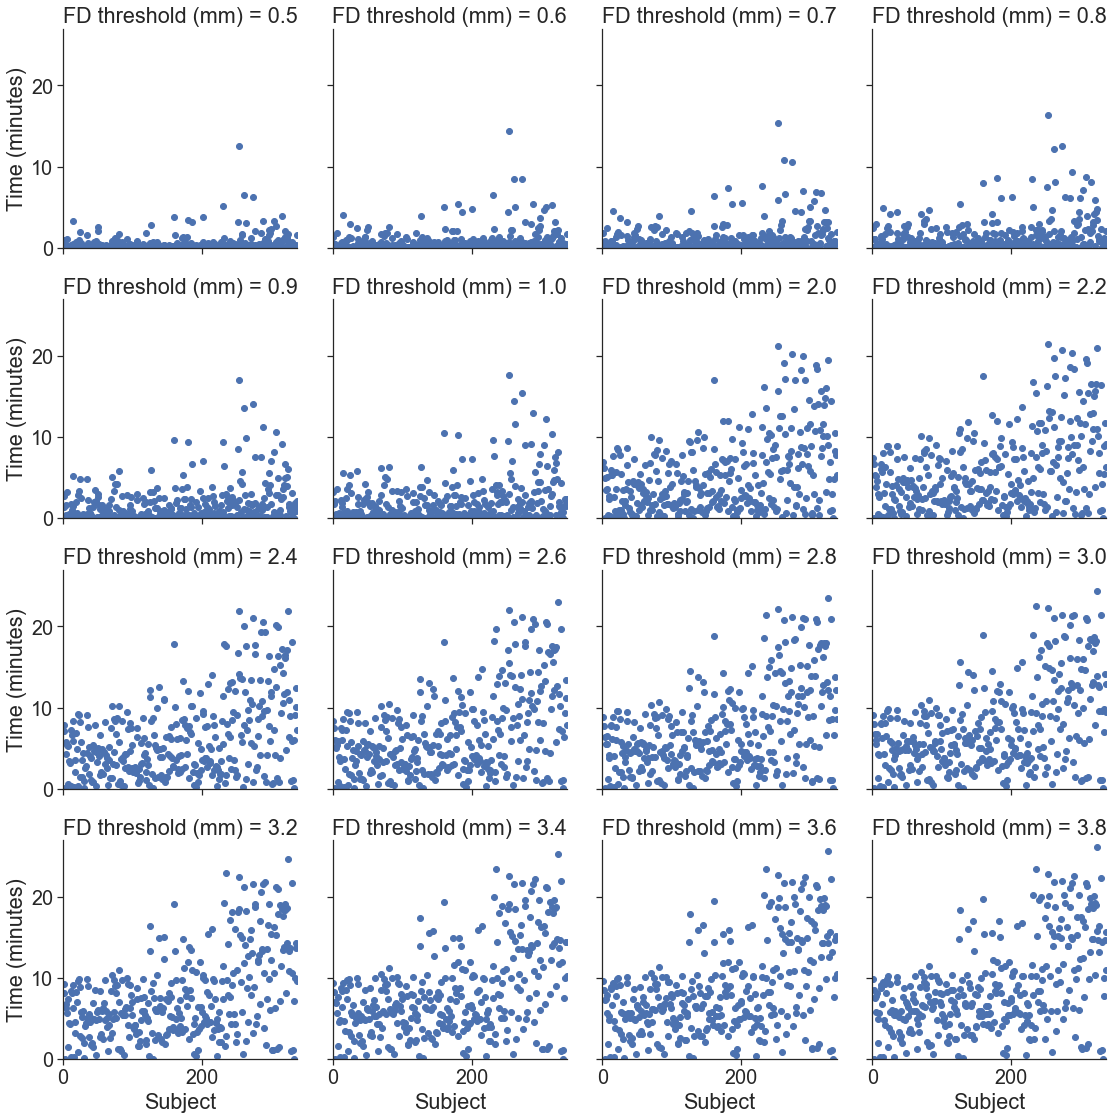

In [25]:
sns.set(style="ticks", font_scale=1.8)
#sns.set_context(font_scale=1.5)
grid = sns.FacetGrid(all_motion, col="FD threshold (mm)", col_wrap=4, height=4)
grid.map(plt.scatter, "Subject", "Time (minutes)", marker="o")
grid.set(xlim=(0, 337), ylim=(0, 27))
#plt.savefig('../../../Desktop/Motion2.png',bbox_inches='tight')